# Análisis exploratorio de datos - Ejemplo completo

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Agosto de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene un ejemplo completo de análisis exploratorio de datos (EDA). Se utiliza un set de datos de ventas de amazon.

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- pandas (2.2.2)
- numpy (2.0.2)
- matplotlib (3.10.0)
- seaborn (0.13.2)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Descripción del conjunto de datos

+ product_id - Product ID
+ product_name - Name of the Product
+ category - Category of the Product
+ discounted_price - Discounted Price of the Product
+ actual_price - Actual Price of the Product
+ discount_percentage - Percentage of Discount for the Product
+ rating - Rating of the Product
+ rating_count - Number of people who voted for the Amazon rating
+ about_product - Description about the Product
+ user_id - ID of the user who wrote review for the Product
+ user_name - Name of the user who wrote review for the Product
+ review_id - ID of the user review
+ review_title - Short review
+ review_content - Long review
+ img_link - Image Link of the Product
+ product_link - Official Website Link of the Product

![](https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/master/imagenes_notebooks/EDA.jpeg)

😀 *Imagen creada con ideogram.ia*

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

# Carga de datos

In [2]:
# Descargar el archivo y guardarlo en el entorno
!wget https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/master/data/amazon.csv

--2025-08-30 18:13:02--  https://raw.githubusercontent.com/JaznaLaProfe/Fundamentos-de-Machine-Learning/master/data/amazon.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4744481 (4.5M) [text/plain]
Saving to: ‘amazon.csv’

amazon.csv          100%[===================>]   4.52M  --.-KB/s    in 0.08s   

2025-08-30 18:13:02 (53.7 MB/s) - ‘amazon.csv’ saved [4744481/4744481]



In [73]:
data = pd.read_csv("amazon.csv")

# Cantidad de observaciones y columnas

In [71]:
print(f'Número de observaciones en el conjunto : {data.shape[0]}')
print(f'Número de columnas en el conjunto : {data.shape[1]}')

Número de observaciones en el conjunto : 1465
Número de columnas en el conjunto : 16


# Revisión de calidad de los datos

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## Valores nulos o faltantes

In [72]:
# Muestra una tabla con los % de nulos de cada columa
columnas_con_nulos = data.isna().sum()[data.isna().sum() > 0]
porcentaje_nulos = (columnas_con_nulos / data.shape[0]) * 100

resultado = pd.DataFrame({
    "Cantidad Nulos": columnas_con_nulos,
    "Porcentaje Nulos (%)": porcentaje_nulos
}).round(2)

resultado

,Cantidad Nulos,Porcentaje Nulos (%)
rating,1,0.07
rating_count,2,0.14


---
**Comentarios**

---

+ Se distinguen 2 columnas con valores nulos, con un porcentaje relativamente bajo.

+ Estos datos deben ser tratados en la fase de preparación de datos.

## Revisión de consistencia de tipos de datos

A continuación se revisan los tipos de datos de las columnas para chequear que exista consistencia entre el tipo de dato y la naturaleza del mismo.

In [74]:
# Revisa los tipos de datos
data.dtypes

,0
product_id,object
product_name,object
category,object
discounted_price,object
actual_price,object
discount_percentage,object
rating,object
rating_count,object
about_product,object
user_id,object


Se aprecia que todas las columnas son del tipo ```object``` y las columnas que deberán considerar una conversión, dado lo que representan, son:

+ ```discounted_price```
+ ```actual_price```
+ ```discount_percentage```
+ ```rating```
+ ```rating_count```

### Tratamiento ```discounted_price```

In [75]:
data.discounted_price.describe()

,discounted_price
count,1465
unique,550
top,₹199
freq,53


In [76]:
data['discounted_price'] = data['discounted_price'].astype(str)
data['discounted_price'] = data['discounted_price'].str.replace('₹','',regex=False)
data['discounted_price'] = data['discounted_price'].str.replace(',','',regex=False).astype(float)
data['discounted_price'] = pd.to_numeric(data['discounted_price'])

In [78]:
data.discounted_price.describe().round(0)

,discounted_price
count,1465.0
mean,3125.0
std,6944.0
min,39.0
25%,325.0
50%,799.0
75%,1999.0
max,77990.0


### Tratamiento ```actual_price```

In [79]:
data.actual_price.describe()

,actual_price
count,1465
unique,449
top,₹999
freq,120


In [80]:
data['actual_price'] = data['actual_price'].astype(str)  # Convierte a str
data['actual_price'] = data['actual_price'].str.replace('₹', '', regex=False)
data['actual_price'] = data['actual_price'].str.replace(',', '', regex=False)
data['actual_price'] = pd.to_numeric(data['actual_price'], errors='coerce')  # Conversión a decimal

In [81]:
data.actual_price.describe().round(0)

,actual_price
count,1465.0
mean,5445.0
std,10875.0
min,39.0
25%,800.0
50%,1650.0
75%,4295.0
max,139900.0


### Tratamiento ```discount_percentage```

In [82]:
data.discount_percentage.describe()

,discount_percentage
count,1465
unique,92
top,50%
freq,56


In [83]:
data['discount_percentage'] = data['discount_percentage'].astype(str)
data['discount_percentage'] = data['discount_percentage'].str.replace('%','').astype(float)

In [85]:
data.discount_percentage.describe().round(1)

,discount_percentage
count,1465.0
mean,47.7
std,21.6
min,0.0
25%,32.0
50%,50.0
75%,63.0
max,94.0


### Tratamiento ```rating```

In [86]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

### Tratamiento ```rating_count```

In [87]:
data.rating_count.describe()

,rating_count
count,1463
unique,1143
top,"9,378"
freq,9


In [88]:
data['rating_count'] = data['rating_count'].astype('str')
data['rating_count'] =  data['rating_count'].str.replace(',','',regex=False).astype('float')


In [90]:
data['rating_count'].describe().round(2)

,rating_count
count,1463.00
mean,18295.54
std,42753.86
min,2.00
25%,1186.00
50%,5179.00
75%,17336.50
max,426973.00


## Revisión de duplicados

In [169]:
for columna in  data.columns:
  print(f"{columna:<20} ----> {data[columna].duplicated().sum()}")

product_id           ----> 114
product_name         ----> 128
category             ----> 1254
discounted_price     ----> 915
actual_price         ----> 1016
discount_percentage  ----> 1373
rating               ----> 1439
rating_count         ----> 321
about_product        ----> 172
user_id              ----> 271
user_name            ----> 271
review_id            ----> 271
review_title         ----> 271
review_content       ----> 253
img_link             ----> 53
product_link         ----> 0


### Duplicados considerando todas las columnas

In [168]:
duplicados = data[data.duplicated(keep=False)]
duplicados

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


### Duplicados considerando sub-conjunto de columnas

Si bien es cierto no hay duplicados considerando todas las columnas, en este caso, es interesante considerar las repeticiones que se pueden dar considerando las columnas que representan ID

In [172]:
data[['product_id', 'user_id', 'review_id']].duplicated().sum()

np.int64(104)

In [173]:
cuenta_repetidos = data[['product_id', 'user_id', 'review_id']].value_counts()
repetidos = cuenta_repetidos[cuenta_repetidos > 1].index.tolist()
repetidos = pd.DataFrame(repetidos, columns = ['product_id', 'user_id', 'review_id'])
repetidos

,product_id,user_id,review_id
0,B085DTN6R2,"AGUAYQHARAKR2VZTRP276KAGETKQ,AFKTST2773VUOKUHE...","R1QETDIPRCX4S0,RARQYQ8POOFA9,R952F931MCOR5,R3L..."
1,B09NHVCHS9,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R..."
2,B096MSW6CT,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2..."
3,B07XLCFSSN,"AF2IRSQZKMBGX44YDNUPYRHWXOZQ,AF6VSSXOI3Y4PZCNR...","R213ILI3XNVHQ0,R1LZN1V8UCR9IU,R1EBFTZINSJ0LG,R..."
4,B08HDJ86NZ,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1..."
...,...,...,...
79,B0141EZMAI,"AGMJ6TDLOVZIR5ZU65TLJFSLG2BQ,AGPK7U5SHXBYBXEWB...","R3AZDEK3MQA3RA,RXF3HCCBWV0VB,R6CVYFDUXBS36,R1Q..."
80,B09CMM3VGK,"AGHYCMV7RJ5D76UEZDZJPPEUGU5Q,AGKG3U55NSBTQ4QBD...","R223OIZPTZ994S,RATMJ847EPDQX,RHWJXUIB7QJY4,RKK..."
81,B0789LZTCJ,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1..."
82,B09Q8HMKZX,"AF6SKHWKK53BMAI6UVJA5FJMLK3A,AHIWSTMUSIYZAZQAM...","R1LG3XV2XYCQQB,RPVNHPEU1HG9F,R1MD4LW015PP00,R5..."


In [174]:
# Buscar todos los duplicados respecto de una determinada fila
fila_seleccionada = repetidos.loc[1]
duplicados_fila = data[
    (data["product_id"] == fila_seleccionada ["product_id"]) &
    (data["user_id"] == fila_seleccionada ["user_id"]) &
    (data["review_id"] == fila_seleccionada ["review_id"])
]

pd.DataFrame(duplicados_fila)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
23,B09NHVCHS9,Flix Micro Usb Cable For Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,59.0,199.0,70.0,4.0,9378.0,"Micro usb cable is 1 meter in length, optimize...","AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/I/31qGpf8uzu...,https://www.amazon.in/Flix-Micro-Cable-Smartph...
478,B09NHVCHS9,Flix Micro Usb Cable For Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,59.0,199.0,70.0,4.0,9377.0,"Micro usb cable is 1 meter in length, optimize...","AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/I/31qGpf8uzu...,https://www.amazon.in/Flix-Micro-Cable-Smartph...
727,B09NHVCHS9,Flix Micro Usb Cable For Smartphone (Black),Computers&Accessories|Accessories&Peripherals|...,59.0,199.0,70.0,4.0,9377.0,"Micro usb cable is 1 meter in length, optimize...","AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...",Worked on iPhone 7 and didn’t work on iPhone X...,https://m.media-amazon.com/images/I/31qGpf8uzu...,https://www.amazon.in/Flix-Micro-Cable-Smartph...


# Análisis exploratorio

## Análisis univariado

### Categorías más populares

In [60]:
top_categories = data['category'].value_counts().head(5)
top_categories

,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52


### Precio actual

In [96]:
data.actual_price.describe().round(2)

,actual_price
count,1465.00
mean,5444.99
std,10874.83
min,39.00
25%,800.00
50%,1650.00
75%,4295.00
max,139900.00


---
**Comentarios**

---

+ El precio promedio de los productos es de 5.444,99 unidades monetarias.
+ El 75% de los productos presenta un precio igual o inferior a 4.295 unidades monetarias.
+ La desviación estándar es alta por lo que se puede considerar un sesgo en los precios de los productos, esto se debe a que se está analizando todas las categorías


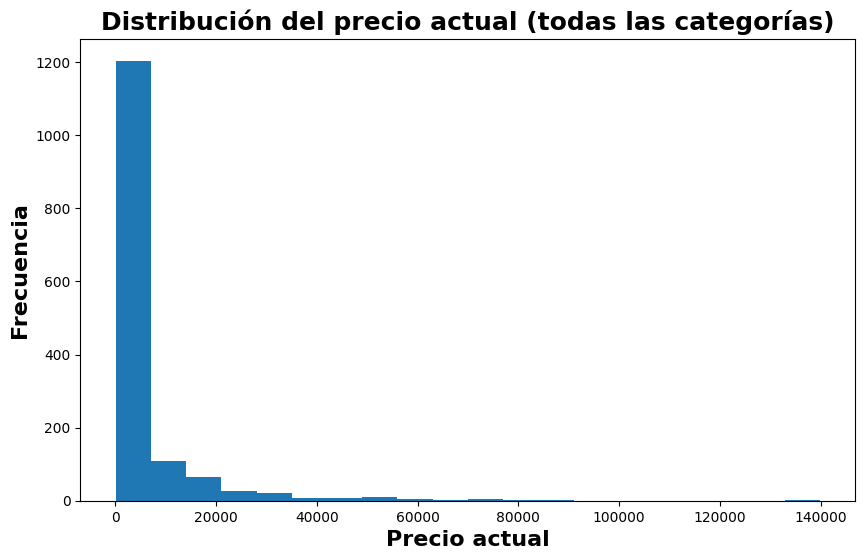

In [176]:
data.actual_price.hist(bins=20, figsize=(10, 6), grid=False)
plt.title('Distribución del precio actual (todas las categorías)', fontsize=18, fontweight="bold")
plt.xlabel('Precio actual', fontsize=16, fontweight="bold")
plt.ylabel('Frecuencia', fontsize=16, fontweight="bold")
plt.show()

### Análisis de precio de una determinada categoría

In [193]:
mas_popular = [top_categories.index[0]]
selected_categories = data[data['category'].isin(mas_popular)]

In [194]:
selected_categories.actual_price.describe().round(2)

,actual_price
count,233.00
mean,906.02
std,509.77
min,199.00
25%,499.00
50%,845.00
75%,1099.00
max,2100.00


In [208]:
moda = selected_categories.groupby('actual_price')['actual_price'].count().sort_values(ascending = False).index[0]
mediana = np.quantile(selected_categories.actual_price, 0.5)
media = np.mean(selected_categories.actual_price)
print("Moda {0} - Mediana {1} - Media {2:.1f}".format(moda, mediana, media))

Moda 999.0 - Mediana 845.0 - Media 906.0


**Interpretación de la relación**

El orden que se da en la recta real es moda - mediana y media; por lo tanto, existe una ***asimetría negativa***.

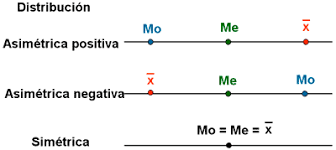

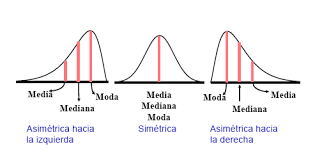

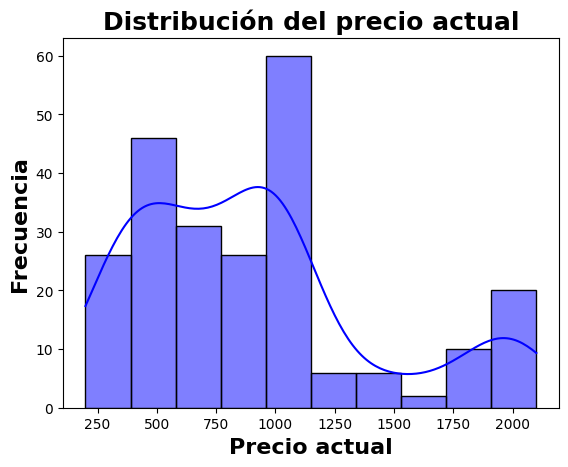

In [215]:
sns.histplot(selected_categories.actual_price, color='blue', edgecolor='black', kde=True)
plt.title('Distribución del precio actual', fontsize=18, fontweight="bold")
plt.xlabel('Precio actual', fontsize=16, fontweight="bold")
plt.ylabel('Frecuencia', fontsize=16, fontweight="bold")
plt.show()

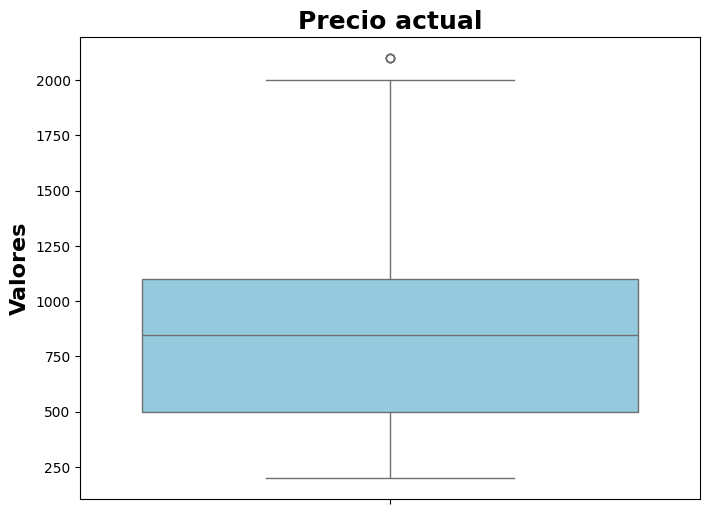

In [183]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=selected_categories['actual_price'], color='skyblue')
plt.title('Precio actual', fontsize=18, fontweight="bold")
#plt.xlabel('Valores', fontsize=16, fontweight="bold")
plt.ylabel('Valores', fontsize=16, fontweight="bold")
plt.show()

---
**Comentarios**

---

Este gráfico permite interpretar **distribución, dispersión y valores atípicos**.

1. **Mediana (línea dentro de la caja):**

   * Está cerca de los **850–900**, lo que indica que la mitad de los precios están por debajo y la otra mitad por encima de ese valor.

2. **Rango intercuartílico (caja azul):**

   * Abarca aproximadamente entre **500 y 1.100**, mostrando dónde se concentra el 50% central de los datos.
   * Esto indica que la mayor parte de los precios actuales están en ese rango.

3. **Valores mínimos y máximos (bigotes):**

   * El valor mínimo está cerca de **200**.
   * El valor máximo sin considerar atípicos llega a **2.000**.

4. **Valores atípicos (puntos fuera de los bigotes):**

   * Se observa al menos un outlier ligeramente por encima de 2.000.
   * Estos valores son precios inusualmente altos en comparación con el resto.

5. **Dispersión general:**

   * La distribución es bastante amplia (desde \~200 hasta más de 2.000).
   * Esto refleja que los precios actuales tienen gran variabilidad.

---

✅ **Interpretación en el negocio**

La mayoría de los precios actuales se concentran entre **500 y 1.100**, con una mediana alrededor de **850–900**. Sin embargo, hay precios significativamente más bajos (\~200) y algunos muy altos (>2,000) que aparecen como valores atípicos.


### Palabras más comunes en los comentarios de los productos

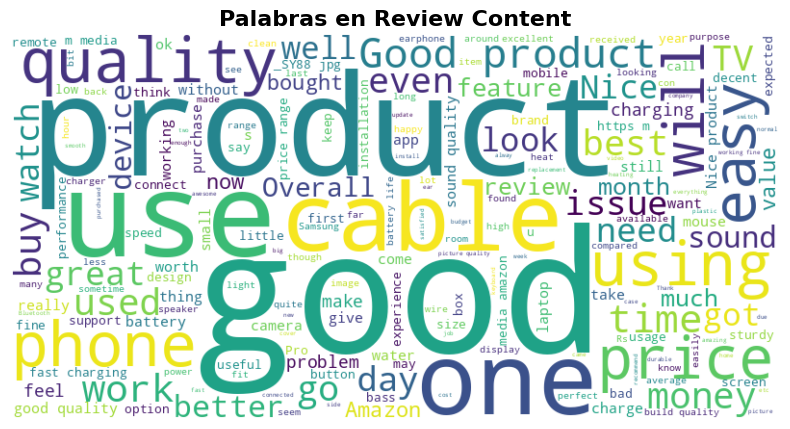

In [50]:
review_text = ' '.join(data['review_content'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(review_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Palabras en Review Content", fontsize=16, fontweight="bold")
plt.show()

## Análisis bivariado

Se realiza un análisis cruzando dos variables:

✅ ```discount_price``` versus ```actual_price``` ➡ Ver la correlación entre el precio actual y el precio con descuento. Debería existir una tendencia positiva.

✅ ```discount_percentage``` versus ```actual_price``` ➡ Ver si los productos con precios más altos presentan más descuento o no.
✅ ```discount_percentage``` versus ```rating``` ➡ Ver si los productos con grandes descuentos reciben malas calificaciones.

✅ ```category``` versus ```rating``` ➡ Analizar cómo las calificaciones varìan a través de las distintas categorías.


###  ```discount_price``` versus ```actual_price```

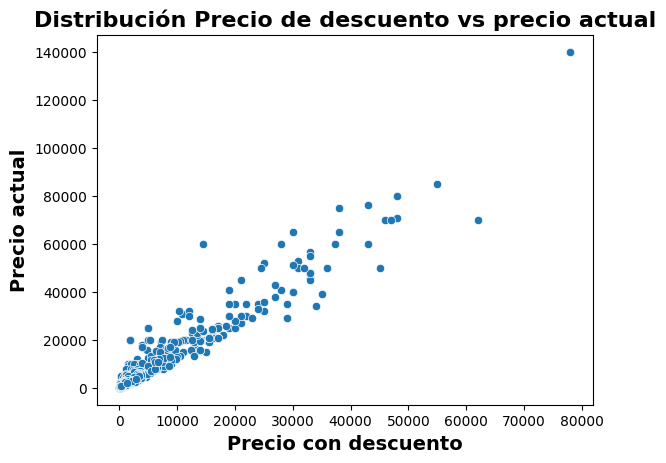

In [177]:
plt.title("Distribución Precio de descuento vs precio actual", fontsize=16, fontweight="bold")
sns.scatterplot(data=data,x='discounted_price',y='actual_price',marker='o')
plt.ylabel('Precio actual', fontsize=14, fontweight="bold")
plt.xlabel('Precio con descuento', fontsize=14, fontweight="bold")
plt.show()

###  ```discount_percentage``` versus ```actual_price```

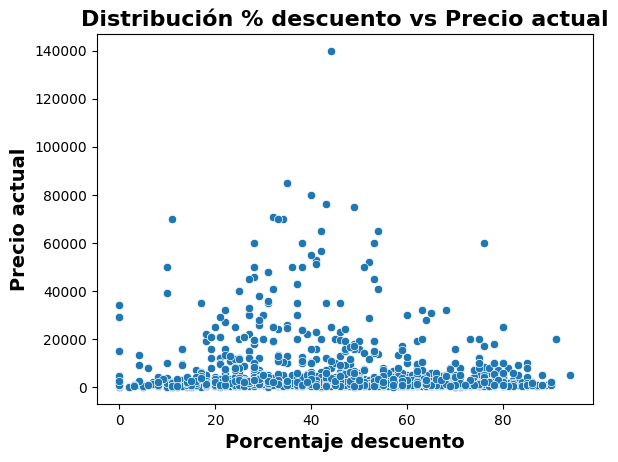

In [55]:
plt.title('Distribución % descuento vs Precio actual', fontsize=16, fontweight="bold")
sns.scatterplot(data=data,x='discount_percentage',y = 'actual_price')
plt.ylabel('Precio actual', fontsize=14, fontweight="bold")
plt.xlabel('Porcentaje descuento', fontsize=14, fontweight="bold")
plt.show()

### ```discount_percentage``` versus ```rating```

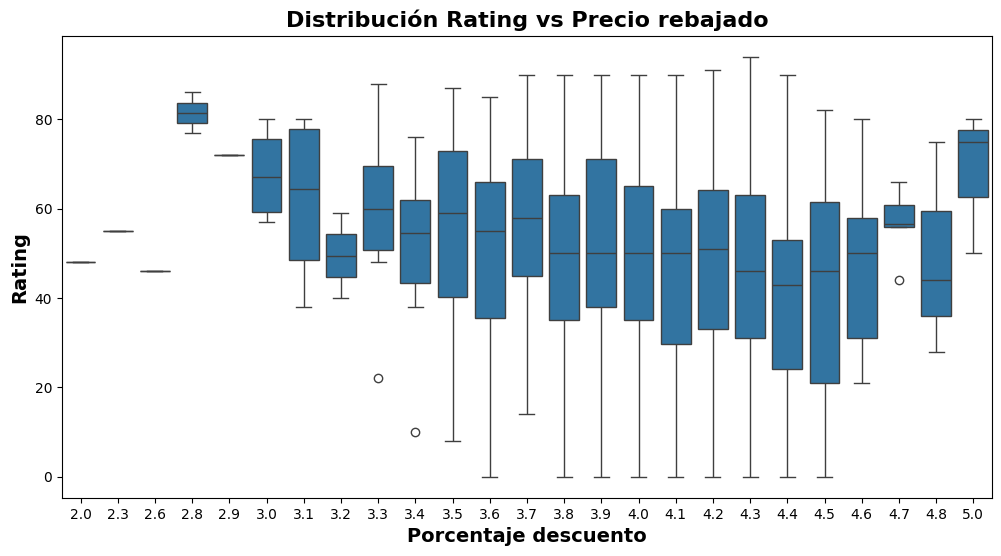

In [57]:
plt.figure(figsize=(12, 6))
plt.title("Distribución Rating vs Precio rebajado", fontsize=16, fontweight="bold")
sns.boxplot(data=data,x='rating',y = 'discount_percentage')
plt.ylabel('Rating', fontsize=14, fontweight="bold")
plt.xlabel('Porcentaje descuento', fontsize=14, fontweight="bold")
plt.show()

---
**Comentarios**

---

Este gráfico (boxplot) está mostrando la relación entre **porcentaje de descuento** y el **rating de los productos**.

---

**1. Tendencia general**

* No se aprecia una **relación clara y lineal** entre mayor descuento y mejor rating.
* Los ratings tienden a dispersarse mucho más cuando el porcentaje de descuento es alto, esto indica que hay más variabilidad en la percepción de los clientes.

---

**2. Valores centrales (mediana)**

* Para descuentos bajos (aproximadamente 2.5% – 3.0%), los ratings están concentrados en valores más altos (aproximadamente 70–85).
* A medida que el descuento crece (3.5% – 4.5%), la mediana de ratings se va reduciendo (aproximadamente 40–60).
* Curiosamente, en el máximo descuento (aproximadamente 5.0%), los ratings suben otra vez y se concentran entre 60–80.

---

**3. Dispersión**

* Con descuentos bajos, los ratings son **más consistentes**, se aprecia porque son cajas pequeñas, sin grandes colas.
* Con descuentos intermedios (3.5 – 4.5%), se da la mayor **variabilidad**: algunos productos tienen rating altísimo y otros cercano a 0. Esto sugiere que no todos los productos con gran rebaja cumplen con la calidad esperada.
* Con el 5% de descuento, los ratings se estabilizan de nuevo, aunque con cierto rango.

---

**4. Outliers**

* En descuentos intermedios hay **outliers muy bajos (aproximadamente 0–20)**, esto indica que productos que, aunque rebajados, generaron **mala experiencia al cliente**.
* Con descuentos bajos o altos, casi no hay outliers negativos, lo que podría indicar que esas promociones están más cuidadas.

---

✅ **Interpretación para negocio**

* **No basta con ofrecer descuentos altos para garantizar satisfacción del cliente.**
* Los clientes parecen más satisfechos con descuentos pequeños o muy altos (5%), pero en el rango medio de descuentos hay una mezcla de productos que generan experiencias muy dispares.
* Esto puede reflejar una **estrategia de liquidación de stock**: los descuentos intermedios aplican a productos de calidad desigual.

---


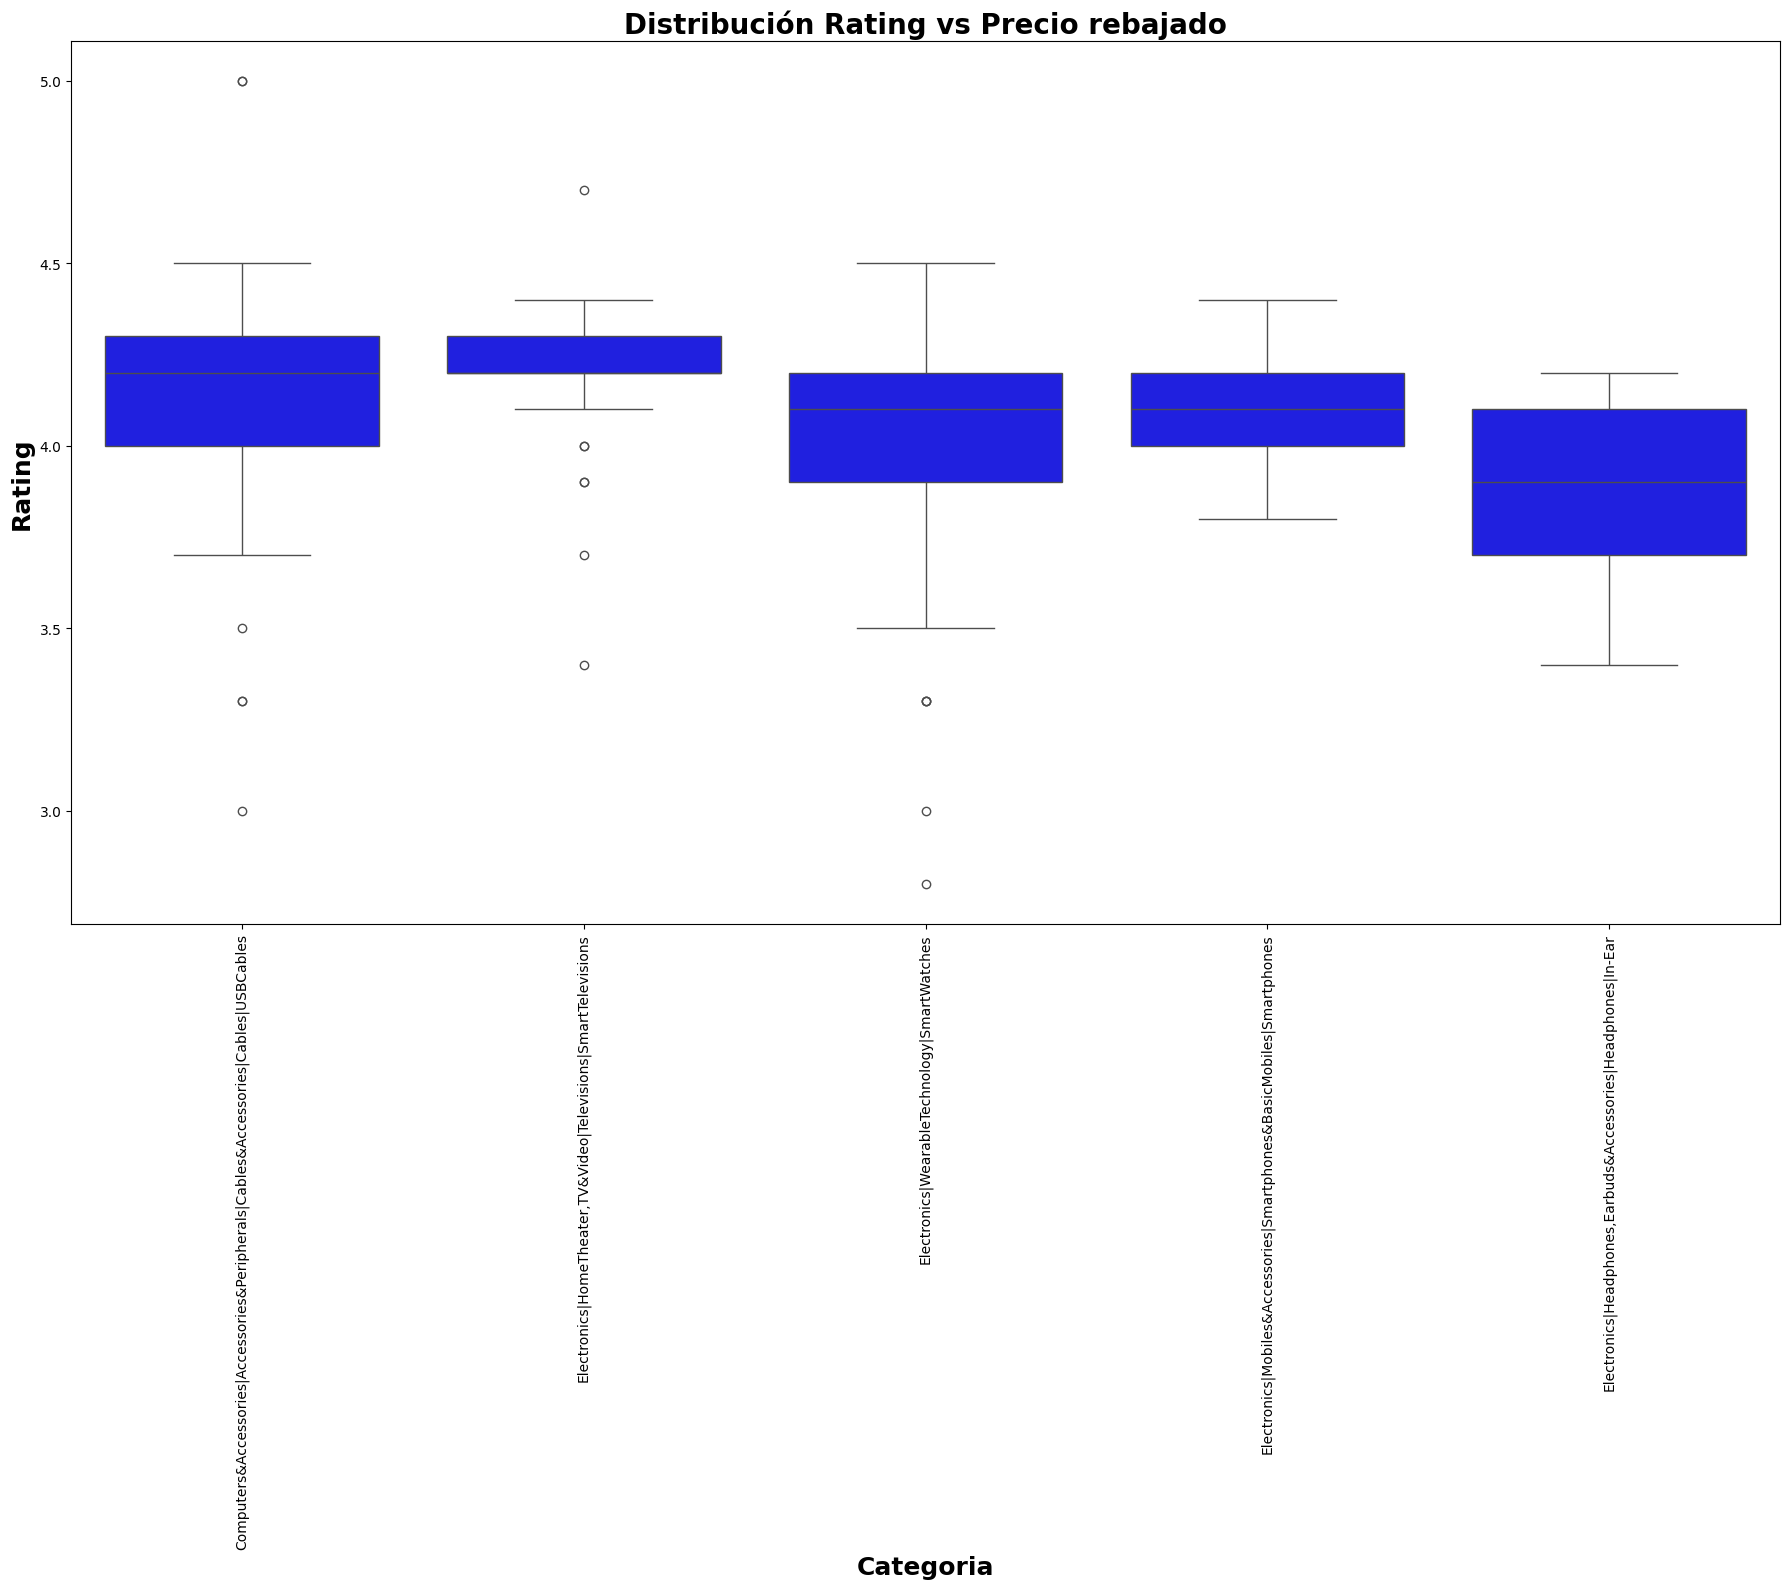

In [68]:
selected_data = data[data['category'].isin(top_categories.index)]
plt.figure(figsize=(18, 16))
plt.title("Distribución Rating vs Precio rebajado", fontsize=20, fontweight="bold")
sns.boxplot(data=selected_data, x = 'category', y = 'rating',color='blue')
plt.ylabel('Rating', fontsize=18, fontweight="bold")
plt.xlabel('Categoria', fontsize=18, fontweight="bold")
plt.xticks(rotation=90)
plt.tight_layout()

**Comentarios**

Respecto de las 5 categorías más populares con el *rating* de los productos:

---

**1. Tendencia central (mediana de ratings)**

* Todas las categorías se mueven entre **3.8 y 4.3 aprox.**, lo que indica que los productos más populares suelen estar **bien evaluados en general**.
* La categoría con **mediana más alta** se ve en *Electrónica y Smartphones* (segunda categoría más popular), lo que refleja **mejor valoración promedio de los clientes**.
* La categoría con **mediana más baja** es *Electrónica/Hogar pequeños electrodomésticos* → los productos ahí tienden a recibir valoraciones algo menores.

---

**2. Dispersión (caja e IQR)**

* Categorías como *Computación/Accesorios* y *Electrónica Hogar* tienen cajas más amplias, es decir, presentan mayor **variabilidad en la percepción de los clientes**.
* Otras categorías como *Smartphones* tienen cajas más compactas, es decir, los ratings son más **consistentes y predecibles**.

---

**3. Outliers**

* Se observan varios puntos por debajo de 3, especialmente en *Wearables y Hogar*. Esto indica que, aunque en promedio los ratings son buenos, **existen productos muy mal evaluados** en esas categorías.
* Algunas categorías muestran outliers en la parte alta (cerca de 5) → productos con **valoraciones perfectas** que destacan sobre la media.

---

**4. Comparación general**

* No hay categorías con mediana inferior a 3.5 → en general el público **percibe calidad aceptable en todas**.
* Sin embargo, la **percepción de calidad no es uniforme**: en *Wearables y Hogar* la dispersión sugiere que algunos productos funcionan muy bien, pero otros generan bastante insatisfacción.

---

✅ **Interpretación con sentido de negocio:**

El gráfico muestra que aunque las categorías más populares suelen mantener ratings buenos (entre 4 y 4.3), la **consistencia y satisfacción de los clientes varía mucho según la categoría**. Para un equipo de negocio, este análisis permitiría identificar **dónde reforzar controles de calidad o selección de productos** (por ejemplo, Wearables y Hogar) y dónde se mantiene una experiencia estable (por ejemplo, Smartphones).

---


### ```category``` versus ```rating```

In [ ]:
selected_categories = top_categories.index[1:3]
selected_categories = data[data['category'].isin(np.array(selected_categories))]

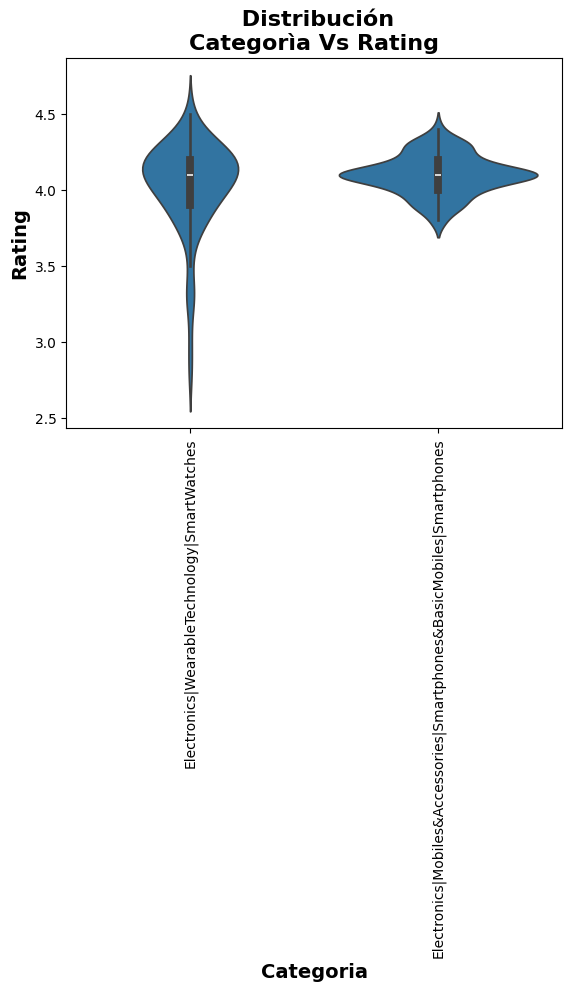

In [161]:
plt.title(' Distribución\nCategorìa Vs Rating', fontsize=16, fontweight="bold")
sns.violinplot(data=selected_categories, x='category', y='rating')
plt.xlabel('Categoria', fontsize=14, fontweight="bold")
plt.ylabel('Rating', fontsize=14, fontweight="bold")
plt.xticks(rotation=90)
plt.show()

---
**Comentarios**

---
Este gráfico muestra la distribución de los **ratings** para las 2 categorías más populares de productos.


---

**Interpretaciones**

1. **Forma de la distribución**

   * La categoría **Smartwatches** muestra una distribución un poco más extendida (con colas hacia abajo), indicando que algunos productos reciben valoraciones más bajas (en torno a 3.3 – 3.5).
   * La categoría **Smartphones** tiene una distribución más concentrada en torno a 4.0 – 4.2, lo que indica mayor consistencia en las valoraciones.

2. **Mediana del rating**

   * En ambos casos, la mediana se ubica sobre **4.0**, lo que refleja en general buena aceptación de los productos.
   * **Smartphones** parecen tener una mediana ligeramente más estable (menos dispersión alrededor del 4).

3. **Dispersión y variabilidad**

   * Los **Smartwatches** presentan más variabilidad en la percepción de calidad: algunos con valoraciones bajas (\~3.0), pero la mayoría bien valorados (>4).
   * Los **Smartphones** tienen menos productos con malas valoraciones, siendo un grupo más homogéneo.

4. **Conclusión práctica**

   * Ambos tipos de productos son bien evaluados, pero **Smartphones** generan opiniones más consistentes.
   * **Smartwatches** podrían estar más sujetos a diferencias de calidad entre modelos/marcas, lo que explica la mayor dispersión.

---

Los **violin plots permiten ver tanto la tendencia central (mediana) como la forma de la distribución (asimetría, colas, concentración de datos)**, algo que no siempre es tan evidente en un boxplot.

---



## Análisis de correlación

### Análisis considerando todas las categorías

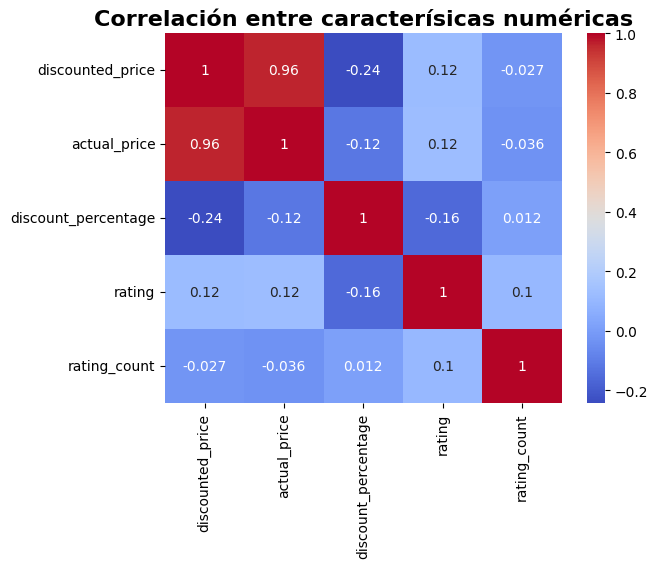

In [59]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlación entre caracterísicas numéricas", fontsize=16, fontweight="bold")
plt.show()

---
**Comentarios**

---
Este gráfico muestra cómo se relacionan entre sí las variables numéricas del dataset. Vamos con el análisis:

---

**Observaciones principales**

1. **discounted\_price vs actual\_price (0.96)**

   * Correlación **muy alta y positiva**.
   * Esto es esperable porque el precio con descuento se calcula directamente a partir del precio original.
   * En la práctica: **si sube el precio original, también sube el precio con descuento**.

2. **discount\_percentage con precios (-0.24 y -0.12)**

   * Relación **negativa débil**.
   * Indica que a mayor porcentaje de descuento, tienden a bajar tanto el precio original como el rebajado, pero la relación no es fuerte.
   * Posible explicación: los productos más caros no siempre reciben los descuentos más grandes.

3. **rating con otras variables (\~0.1 – 0.12)**

   * Correlación **muy débil** con precios y descuentos.
   * Esto sugiere que el nivel de descuento o el precio del producto **no influyen demasiado en la calificación de los usuarios**.
   * Los clientes parecen evaluar más por calidad/experiencia que por el precio.

4. **rating\_count con rating (0.1)**

   * Relación **ligeramente positiva**: productos con más reseñas tienden a tener una buena valoración, aunque la relación es débil.
   * Esto podría indicar que la popularidad **no garantiza** una calificación muy alta, pero tampoco suele ser negativa.

---

**Conclusiones generales**

* La única correlación **fuerte** es entre `discounted_price` y `actual_price` (lógica, porque son dependientes).
* Las variables de **precios y descuentos tienen poca relación con las valoraciones** (`rating`).
* El **rating\_count** muestra independencia de precios y descuentos, lo que sugiere que la cantidad de reseñas depende de otros factores (popularidad de la marca, marketing, visibilidad del producto).
* Para análisis predictivo:

  * **Precios** son buenos predictores entre sí.
  * **Ratings y reseñas** deben analizarse con variables adicionales (ej. categoría, marca) para explicar mejor el comportamiento.

---

✅ **Interpretación en el negocio**

El precio original y el precio con descuento están fuertemente relacionados, pero los precios y descuentos no parecen afectar mucho la percepción de calidad de los usuarios (ratings). Esto sugiere que el valor percibido por los clientes depende más de factores de producto que de estrategias de precios.

¿Quieres que te prepare una **versión lista para usar en diapositiva** (con viñetas y breve interpretación visual) para este gráfico también?


### Análisis considerando la categoría más popular

Considerando la misma lógica aplicada en el análisis del precio, acá se realiza el análisis considerando sólo una categoría; en este caso, la categoría más popular

In [163]:
mas_popular = [top_categories.index[0]]
selected_data_corr = data[data['category'].isin(mas_popular)]

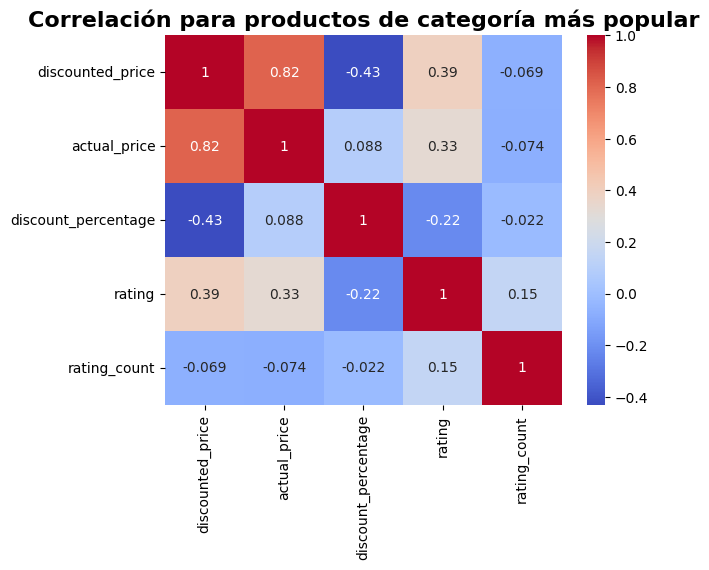

In [165]:
sns.heatmap(selected_data_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlación para productos de categoría más popular", fontsize=16, fontweight="bold")
plt.show()

---
**Comentarios**

---

1. **discounted\_price vs actual\_price (0.82)**

   * Correlación **alta y positiva**, aunque un poco menor que en el análisis con todos los productos (0.96).
   * En esta categoría, el precio con descuento sigue dependiendo fuertemente del precio original, pero hay **más variabilidad en los descuentos aplicados**.

2. **discount\_percentage con precios (-0.43 con discounted\_price, +0.088 con actual\_price)**

   * La relación con el **precio con descuento es claramente negativa**:
     cuanto mayor es el porcentaje de descuento, menor es el precio rebajado (lógico).
   * Sin embargo, con el **precio original casi no hay relación**, lo que indica que en esta categoría los descuentos **no se aplican de forma proporcional al precio inicial** (ej. un producto caro puede tener un descuento bajo y otro barato, un descuento alto).

3. **rating con precios (0.39 con discounted\_price, 0.33 con actual\_price)**

   * Aquí aparece algo muy interesante:
     hay una **correlación positiva moderada** entre precio y calificación.
   * Esto sugiere que en esta categoría, los productos más caros tienden a recibir **mejores valoraciones de los clientes**.
   * Puede deberse a que los modelos más costosos son percibidos como de mayor calidad.

4. **rating con discount\_percentage (-0.22)**

   * Correlación negativa débil: productos con mayores descuentos tienden a tener calificaciones algo más bajas.
   * Esto podría reflejar una percepción de que lo muy rebajado quizás es menos valorado por los usuarios.

5. **rating\_count (reseñas) con rating (0.15)**

   * Relación débil, pero positiva: más reseñas tienden a asociarse con buenas calificaciones.
   * En esta categoría, la popularidad sí se relaciona un poco con mejor percepción.

---

**Conclusiones para esta categoría**

* A diferencia del análisis general, aquí el **precio se asocia con la valoración de los usuarios** → más caro = mejor rating.
* El **descuento alto no garantiza mejor percepción**, incluso podría asociarse a calificaciones más bajas.
* La relación entre precios rebajados y originales sigue siendo fuerte, pero con más dispersión que en el conjunto completo.
* Esto sugiere que **analizar por categoría revela patrones específicos de comportamiento del consumidor**.

---

✅ **Interpretación en el negocio**

* Precios y ratings están **más conectados** en esta categoría.
* Descuentos altos **no necesariamente atraen buenas valoraciones**.
* Se confirma que el análisis global puede **ocultar particularidades de cada categoría**.




In [166]:
segunda_mas_popular = [top_categories.index[1]]
selected_data_corr = data[data['category'].isin(segunda_mas_popular)]

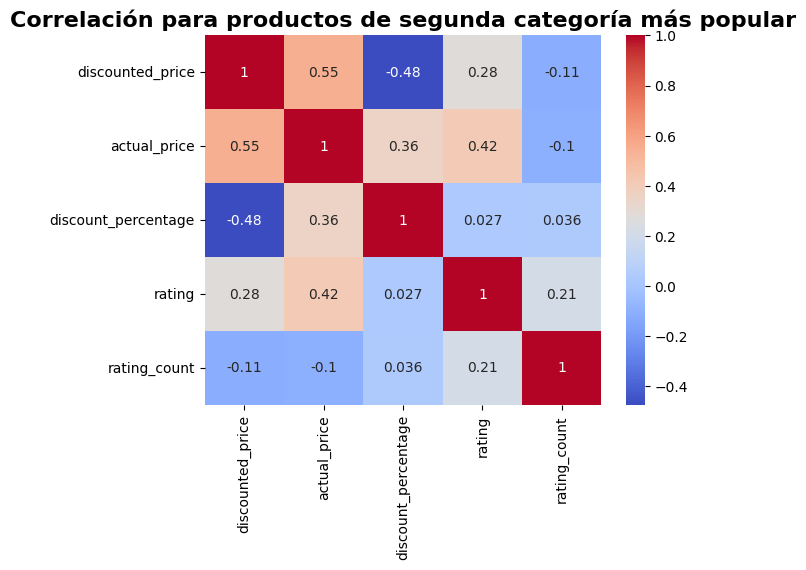

In [167]:
sns.heatmap(selected_data_corr.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlación para productos de segunda categoría más popular", fontsize=16, fontweight="bold")
plt.show()